# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


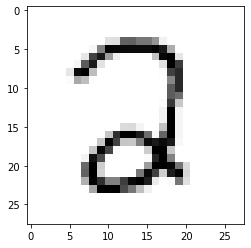

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2427
Training Accuracy: 0.7221, Testing Accuracy: 0.7288



Epoch 10, Loss 0.0689
Training Accuracy: 0.9346, Testing Accuracy: 0.9441



Epoch 20, Loss 0.0457
Training Accuracy: 0.9526, Testing Accuracy: 0.9637



Epoch 30, Loss 0.0376
Training Accuracy: 0.9582, Testing Accuracy: 0.9688



Epoch 40, Loss 0.0334
Training Accuracy: 0.9620, Testing Accuracy: 0.9693



Epoch 50, Loss 0.0307
Training Accuracy: 0.9648, Testing Accuracy: 0.9713



Epoch 60, Loss 0.0288
Training Accuracy: 0.9660, Testing Accuracy: 0.9728



Epoch 70, Loss 0.0272
Training Accuracy: 0.9683, Testing Accuracy: 0.9728



Epoch 80, Loss 0.0259
Training Accuracy: 0.9702, Testing Accuracy: 0.9733



Epoch 90, Loss 0.0249
Training Accuracy: 0.9710, Testing Accuracy: 0.9753



Epoch 100, Loss 0.0239
Training Accuracy: 0.9718, Testing Accuracy: 0.9753



Epoch 110, Loss 0.0231
Training Accuracy: 0.9727, Testing Accuracy: 0.9758



Epoch 120, Loss 0.0224
Training Accuracy: 0.9725, Testing Accuracy: 0.9758



Epoch 130, Loss 0.0217
Training Accuracy: 0.9737, Testing Accuracy: 0.9763



Epoch 140, Loss 0.0211
Training Accuracy: 0.9750, Testing Accuracy: 0.9768



Epoch 150, Loss 0.0205
Training Accuracy: 0.9759, Testing Accuracy: 0.9773



Epoch 160, Loss 0.02
Training Accuracy: 0.9765, Testing Accuracy: 0.9778



Epoch 170, Loss 0.0195
Training Accuracy: 0.9769, Testing Accuracy: 0.9768



Epoch 180, Loss 0.019
Training Accuracy: 0.9777, Testing Accuracy: 0.9768



Epoch 190, Loss 0.0185
Training Accuracy: 0.9783, Testing Accuracy: 0.9763



Epoch 200, Loss 0.0181
Training Accuracy: 0.9786, Testing Accuracy: 0.9773



Epoch 210, Loss 0.0177
Training Accuracy: 0.9793, Testing Accuracy: 0.9768



Epoch 220, Loss 0.0173
Training Accuracy: 0.9798, Testing Accuracy: 0.9773



Epoch 230, Loss 0.0169
Training Accuracy: 0.9802, Testing Accuracy: 0.9773



Epoch 240, Loss 0.0165
Training Accuracy: 0.9810, Testing Accuracy: 0.9773



Epoch 250, Loss 0.0162
Training Accuracy: 0.9815, Testing Accuracy: 0.9768



0.004131154041000327

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2207
Training Accuracy: 0.7718, Testing Accuracy: 0.7949



Epoch 10, Loss 0.102
Training Accuracy: 0.9069, Testing Accuracy: 0.9209



Epoch 20, Loss 0.0796
Training Accuracy: 0.9247, Testing Accuracy: 0.9390



Epoch 30, Loss 0.0689
Training Accuracy: 0.9333, Testing Accuracy: 0.9461



Epoch 40, Loss 0.0624
Training Accuracy: 0.9379, Testing Accuracy: 0.9501



Epoch 50, Loss 0.0579
Training Accuracy: 0.9413, Testing Accuracy: 0.9546



Epoch 60, Loss 0.0546
Training Accuracy: 0.9443, Testing Accuracy: 0.9577



Epoch 70, Loss 0.052
Training Accuracy: 0.9467, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0499
Training Accuracy: 0.9483, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0482
Training Accuracy: 0.9497, Testing Accuracy: 0.9607



Epoch 100, Loss 0.0467
Training Accuracy: 0.9510, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0455
Training Accuracy: 0.9520, Testing Accuracy: 0.9642



Epoch 120, Loss 0.0444
Training Accuracy: 0.9528, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0434
Training Accuracy: 0.9533, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0426
Training Accuracy: 0.9540, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0418
Training Accuracy: 0.9550, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0411
Training Accuracy: 0.9557, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0405
Training Accuracy: 0.9563, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0399
Training Accuracy: 0.9571, Testing Accuracy: 0.9667



Epoch 190, Loss 0.0394
Training Accuracy: 0.9580, Testing Accuracy: 0.9672



Epoch 200, Loss 0.0389
Training Accuracy: 0.9584, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0384
Training Accuracy: 0.9587, Testing Accuracy: 0.9667



Epoch 220, Loss 0.038
Training Accuracy: 0.9591, Testing Accuracy: 0.9662



Epoch 230, Loss 0.0376
Training Accuracy: 0.9598, Testing Accuracy: 0.9667



Epoch 240, Loss 0.0372
Training Accuracy: 0.9602, Testing Accuracy: 0.9667



Epoch 250, Loss 0.0369
Training Accuracy: 0.9605, Testing Accuracy: 0.9662



0.029418856112329396

### Comparing results of NN and LR

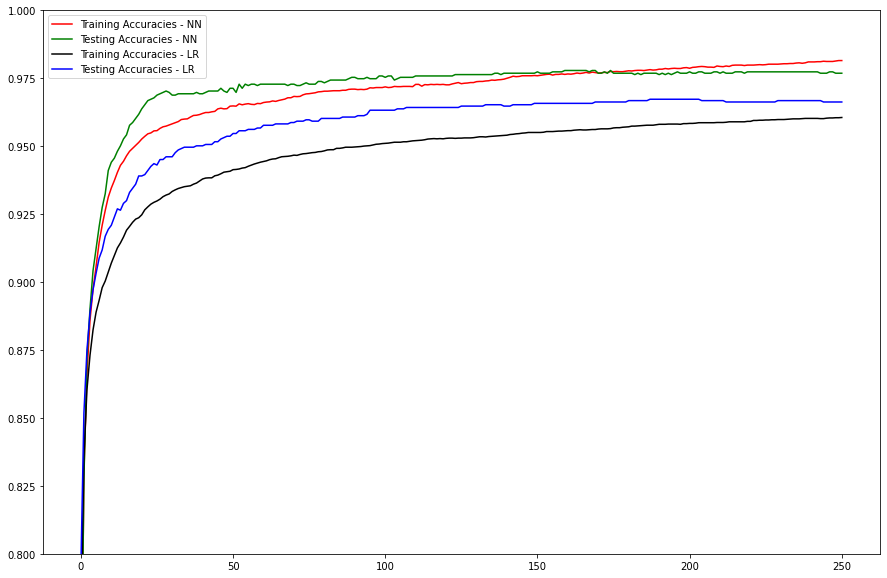

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

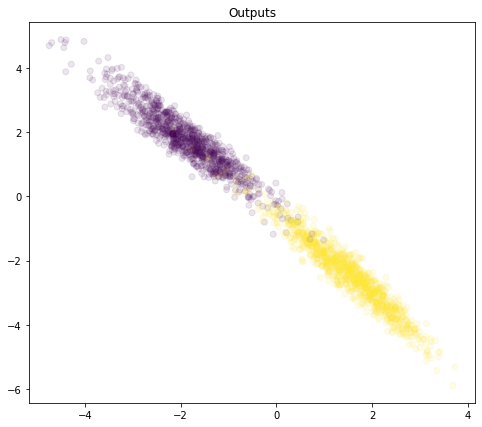

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

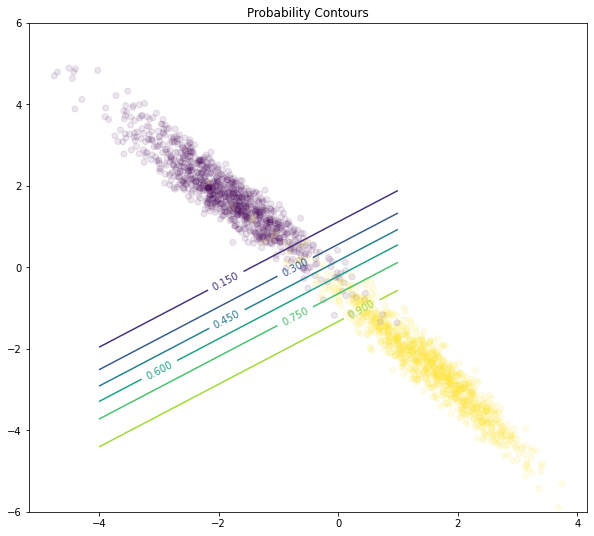

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );